# Random Forests

This notebook implements random forests, which are a type of ensemble model, meaning that they really on the power of large numbers and combine multiple trees to create a more robust and accurate predictive model. They aim to reduce variance which is why the random forest algorithm used in training the ```RandomForestClassifier``` class introduces extra randomness when growing trees. Instead of searching for the best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater diversity of trees which results in even lower variance of the fit model.

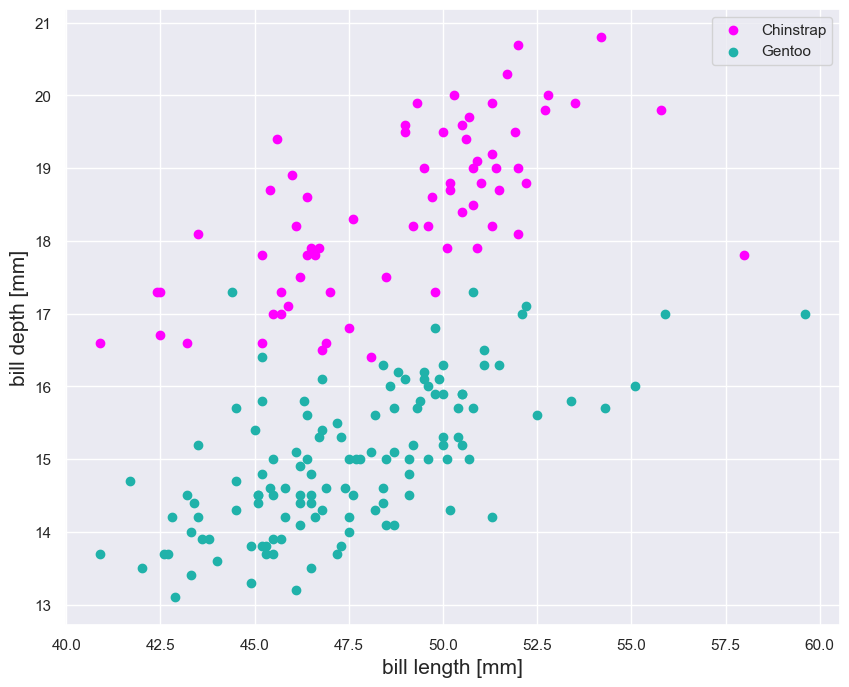

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
penguins = pd.read_csv("Datasets/palmer_penguins.csv")
penguins = penguins.iloc[151:]

X = penguins[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1

# Create target value array
y = penguins["species"].map(make_labels).to_numpy()

# Plot the data
penguin = ["Chinstrap", "Gentoo"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguin, colors):
    temp_df = penguins[penguins.species == species]
    ax.scatter(temp_df.bill_length_mm, temp_df.bill_depth_mm, c = color, label = species)
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

In [ ]:
# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# import ensemble method 
from sklearn.ensemble import VotingClassifier

# split training data 
from sklearn.model_selection import train_test_split

# import metric 
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 9)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[("lr", log_clf), ("rf", rnd_clf), ("svm", svm_clf)], voting = "hard")

svm_clf.fit(X_train, y_train)
svm_y_predict = svm_clf.predict(X_test)
print(f"svm accuracy: {accuracy_score(y_test, svm_y_predict)}")

log_clf.fit(X_train, y_train)
log_y_predict = log_clf.predict(X_test)
print(f"logistic regression accuracy: {accuracy_score(y_test, log_y_predict)}")

rnd_clf.fit(X_train, y_train)
rnd_y_predict = rnd_clf.predict(X_test)
print(f"random forest accuracy: {accuracy_score(y_test, rnd_y_predict)}")

voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
print(f"voting classifier accuracy: {accuracy_score(y_test, y_predict)}")

svm accuracy: 0.8961038961038961
logistic regression accuracy: 0.961038961038961
random forest accuracy: 0.948051948051948
voting classifier accuracy: 0.961038961038961


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 5)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), n_estimators = 500, bootstrap = True, n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.96      1.00      0.98        43

    accuracy                           0.97        77
   macro avg       0.98      0.97      0.97        77
weighted avg       0.98      0.97      0.97        77
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        34
           1       0.95      0.91      0.93        43

    accuracy                           0.92        77
   macro avg       0.92      0.92      0.92        77
weighted avg       0.92      0.92      0.92        77
 



In [ ]:
forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500, bootstrap = True, n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        34
           1       0.95      0.91      0.93        43

    accuracy                           0.92        77
   macro avg       0.92      0.92      0.92        77
weighted avg       0.92      0.92      0.92        77
 



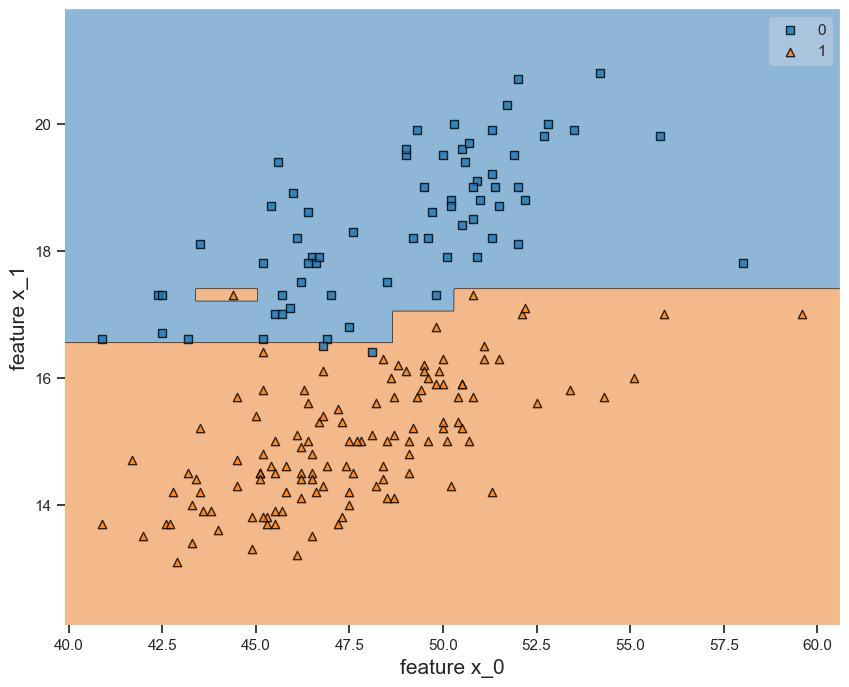

In [ ]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

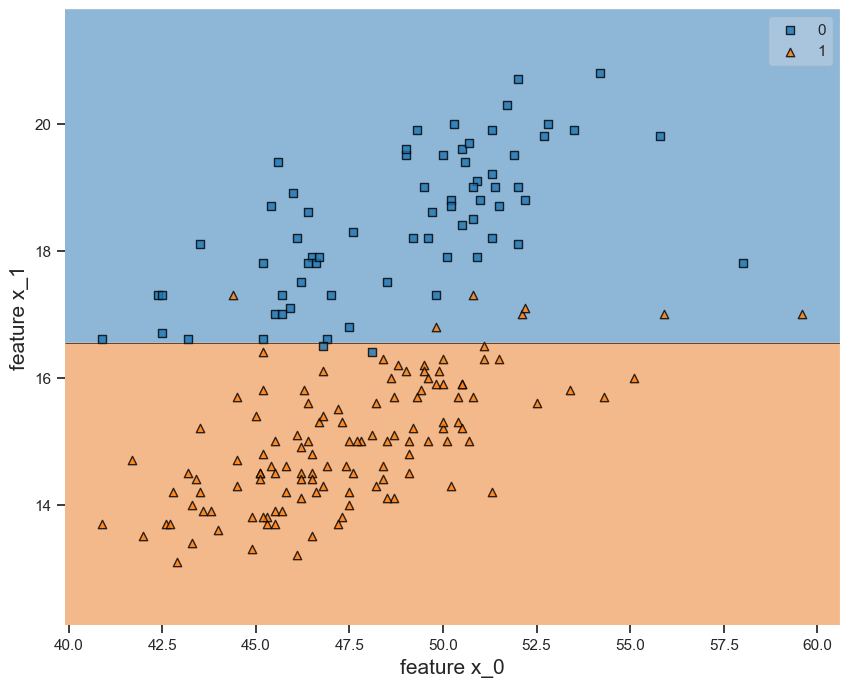

In [ ]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

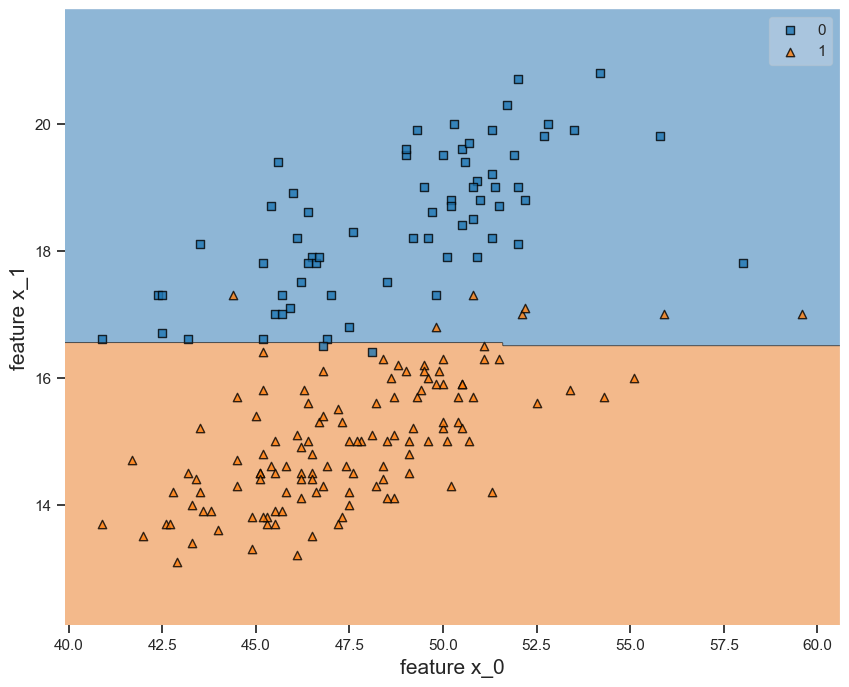

In [ ]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 5)

tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2), n_estimators = 500, bootstrap = True, n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.96      1.00      0.98        43

    accuracy                           0.97        77
   macro avg       0.98      0.97      0.97        77
weighted avg       0.98      0.97      0.97        77
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        34
           1       0.97      0.91      0.94        43

    accuracy                           0.94        77
   macro avg       0.93      0.94      0.93        77
weighted avg       0.94      0.94      0.94        77
 



In [ ]:
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        34
           1       0.97      0.91      0.94        43

    accuracy                           0.94        77
   macro avg       0.93      0.94      0.93        77
weighted avg       0.94      0.94      0.94        77
 



In [ ]:
forest_clf = RandomForestClassifier(max_depth = 3, n_estimators = 500, bootstrap = True, n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        34
           1       0.97      0.91      0.94        43

    accuracy                           0.94        77
   macro avg       0.93      0.94      0.93        77
weighted avg       0.94      0.94      0.94        77
 



Something cool about random forests is that these models make it simple to measure feature importance of each feature. Scikit-learn does this by measuring a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average across all trees in the forest. Feature importance will make another appearance with Principal Component Analysis later on.

In [ ]:
names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

bill_length_mm 0.015413039714317575
bill_depth_mm 0.4191499788367262
flipper_length_mm 0.37867661644973805
body_mass_g 0.1867603649992182


The Random Forest seemed to perform pretty well with at least 94% accuracy in each of the reports, so I'm satisfied with that.